<a href="https://colab.research.google.com/github/Yamito548/Act-3.4/blob/main/Act_3_4_Representaci%C3%B3n_plot_de_datasets_By_Dylan_Ram%C3%ADrez_Berm%C3%BAdez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By Dylan Ramírez Bermúdez ---- Asignatura SNS

In [181]:
#Dataset de vinos, haré una clasifiación según su calidad
# https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

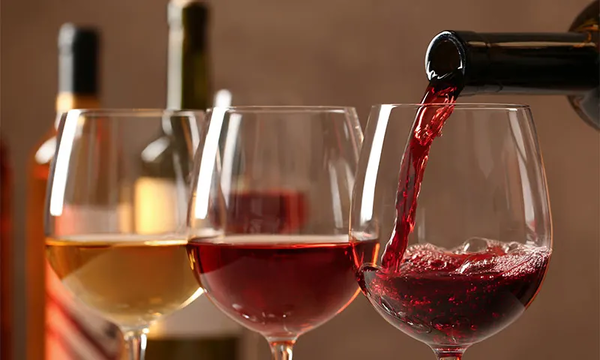

Objetivo

In [182]:
# El objetivo de esta actividad es poner en práctica los conocimientos adquiridos para el
# preprocesamiento de datos, selección de características y entrenamiento de modelos.
# Para ello es necesario seleccionar un Dataset que consideres oportuno, de clasificación o
# regresión, y distinto a los utilizados en clase.

# Dataset de vinos - Describir el origen y breve explicación del Dataset, así como de cada una de las características.


Este dataset tiene información sobre las cualidades de los vinos, lo encontré en kaggle. Con estas columnas se puede sacar su calidad. Entre algunas de las características, aparte de la obvia calidad, esta el ácido cítrico, el azúcar residual, densidad, ph, alcohol entre otras. En total son un total de 10 columnas y este dataset tiene un total de 1143 entradas para poder trabajar. Las columnas son fixed acidity (acidez fija),	volatile acidity (acides volátil), 	citric acid (ácido cítrico),	residual sugar (azúcar residual) ,chlorides, (cloruros),	free sulfur dioxide (dióxido de azufre),	total sulfur dioxide (dióxido de azufre total), 	density (densidad),	pH (ph), 	sulphates (sulfatos),  	alcohol (alcohol),	quality (calidad o variable objetivo, lo que queremos predecir) y Id. Con todos estos datos podremos hacer un modelo de clasifiación para saber la calidad de los vinos. Estos son variantes rojo y blanco del vino portugués "Vinho Verde". Según otra de la información de la web que se encuentra en kaggle. https://archive.ics.uci.edu/dataset/186/wine+quality


# Librerías

In [183]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

# Carga de datos

In [184]:
data = pd.read_csv("/content/wine.csv")
data
#Solo hay datos númericos por lo que no hace falta normalizar los datos ni categorias

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


# Revisamos si hay datos faltantes - Procesamiento y normalización de datos en el dataset

In [185]:
# Verificar valores faltantes en el DataFrame
missing_values = data.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)
#En este dataset no hay datos faltantes

Valores faltantes por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [186]:
#Normalización, vamos a poner todos los datos númericos a una escala buena.
#La decisión de esta normalización es debido a que los datos tienen escalas diferentes
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Supongamos que 'df' es tu DataFrame con datos de vinos
# Selecciona solo las columnas numéricas que deseas normalizar
numeric_columns = ['alcohol', 'pH', 'fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','sulphates']  # Añade todas las columnas relevantes

# Crea un MinMaxScaler
scaler = MinMaxScaler()

# Normaliza los datos seleccionados
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,5,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.358209,0.215548,0.494126,0.362205,0.209581,0.215385,5,1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.208955,0.169611,0.508811,0.409449,0.191617,0.215385,5,2
3,0.584071,0.109589,0.56,0.068493,0.105175,0.238806,0.190813,0.582232,0.330709,0.149701,0.215385,6,3
4,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.150442,0.267123,0.13,0.095890,0.106845,0.417910,0.120141,0.416300,0.535433,0.251497,0.400000,6,1592
1139,0.194690,0.342466,0.08,0.068493,0.093489,0.402985,0.113074,0.472834,0.535433,0.293413,0.169231,6,1593
1140,0.141593,0.328767,0.08,0.075342,0.130217,0.462687,0.134276,0.354626,0.559055,0.149701,0.323077,5,1594
1141,0.115044,0.294521,0.10,0.089041,0.083472,0.567164,0.159011,0.370778,0.614173,0.257485,0.430769,6,1595


# Matriz de gráficos de correlación

Este gráfico podremos ver como se relacionan las características del dataset entre sí. Siendo que 1 es una relación perfecta y -1 todo lo contrario. Normalmente el 1, solo tiene relación perfecta con la misma característica.

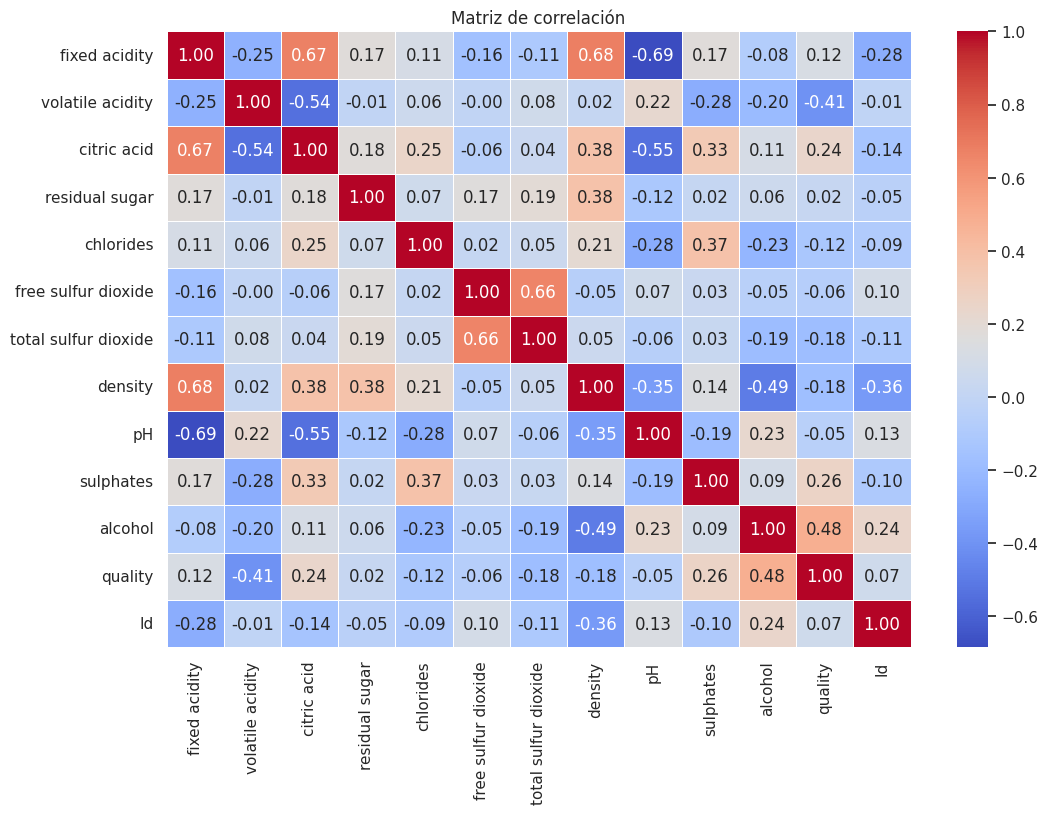

In [187]:
#Calculamos la matriz de correlación
matriz_correlación = data.corr()
#Estilo del gráfico
sns.set(style='white')
#Creamos la figura
plt.figure(figsize=(12,8))
#Mapa de calor
sns.heatmap(matriz_correlación, annot=True, cmap='coolwarm',fmt=".2f", linewidths=.5)

#Vemos el gráfico
plt.title("Matriz de correlación")
plt.show()

Reflexión: En este gráfico podemos ver como se relacionan entre sí todas las características. Se puede ver que con fixed aciditity tiene una buena relación con citric acid, teniendo una correlación positiva de 0,67. Otra características que también se lleva bien es con la density, y no se lleva muy bien con el pH, teniendo un -0,69, muy bajo. Los demás no tienen tan buena relación, el otro que tambíen tiene una relación alta es con free sulfur dioxide y total sulfur dioxide, que tiene una relación de 0.66, estando bien.

En conclusión podemos decir que las relaciones en general entre las características pero tampoco son demasiado malas. Apriori diría que las que tienen una mejor relación son las de fixed acidity, debido a que tiene los valores más altos de relación.



# Matriz de gráficos de dispersión

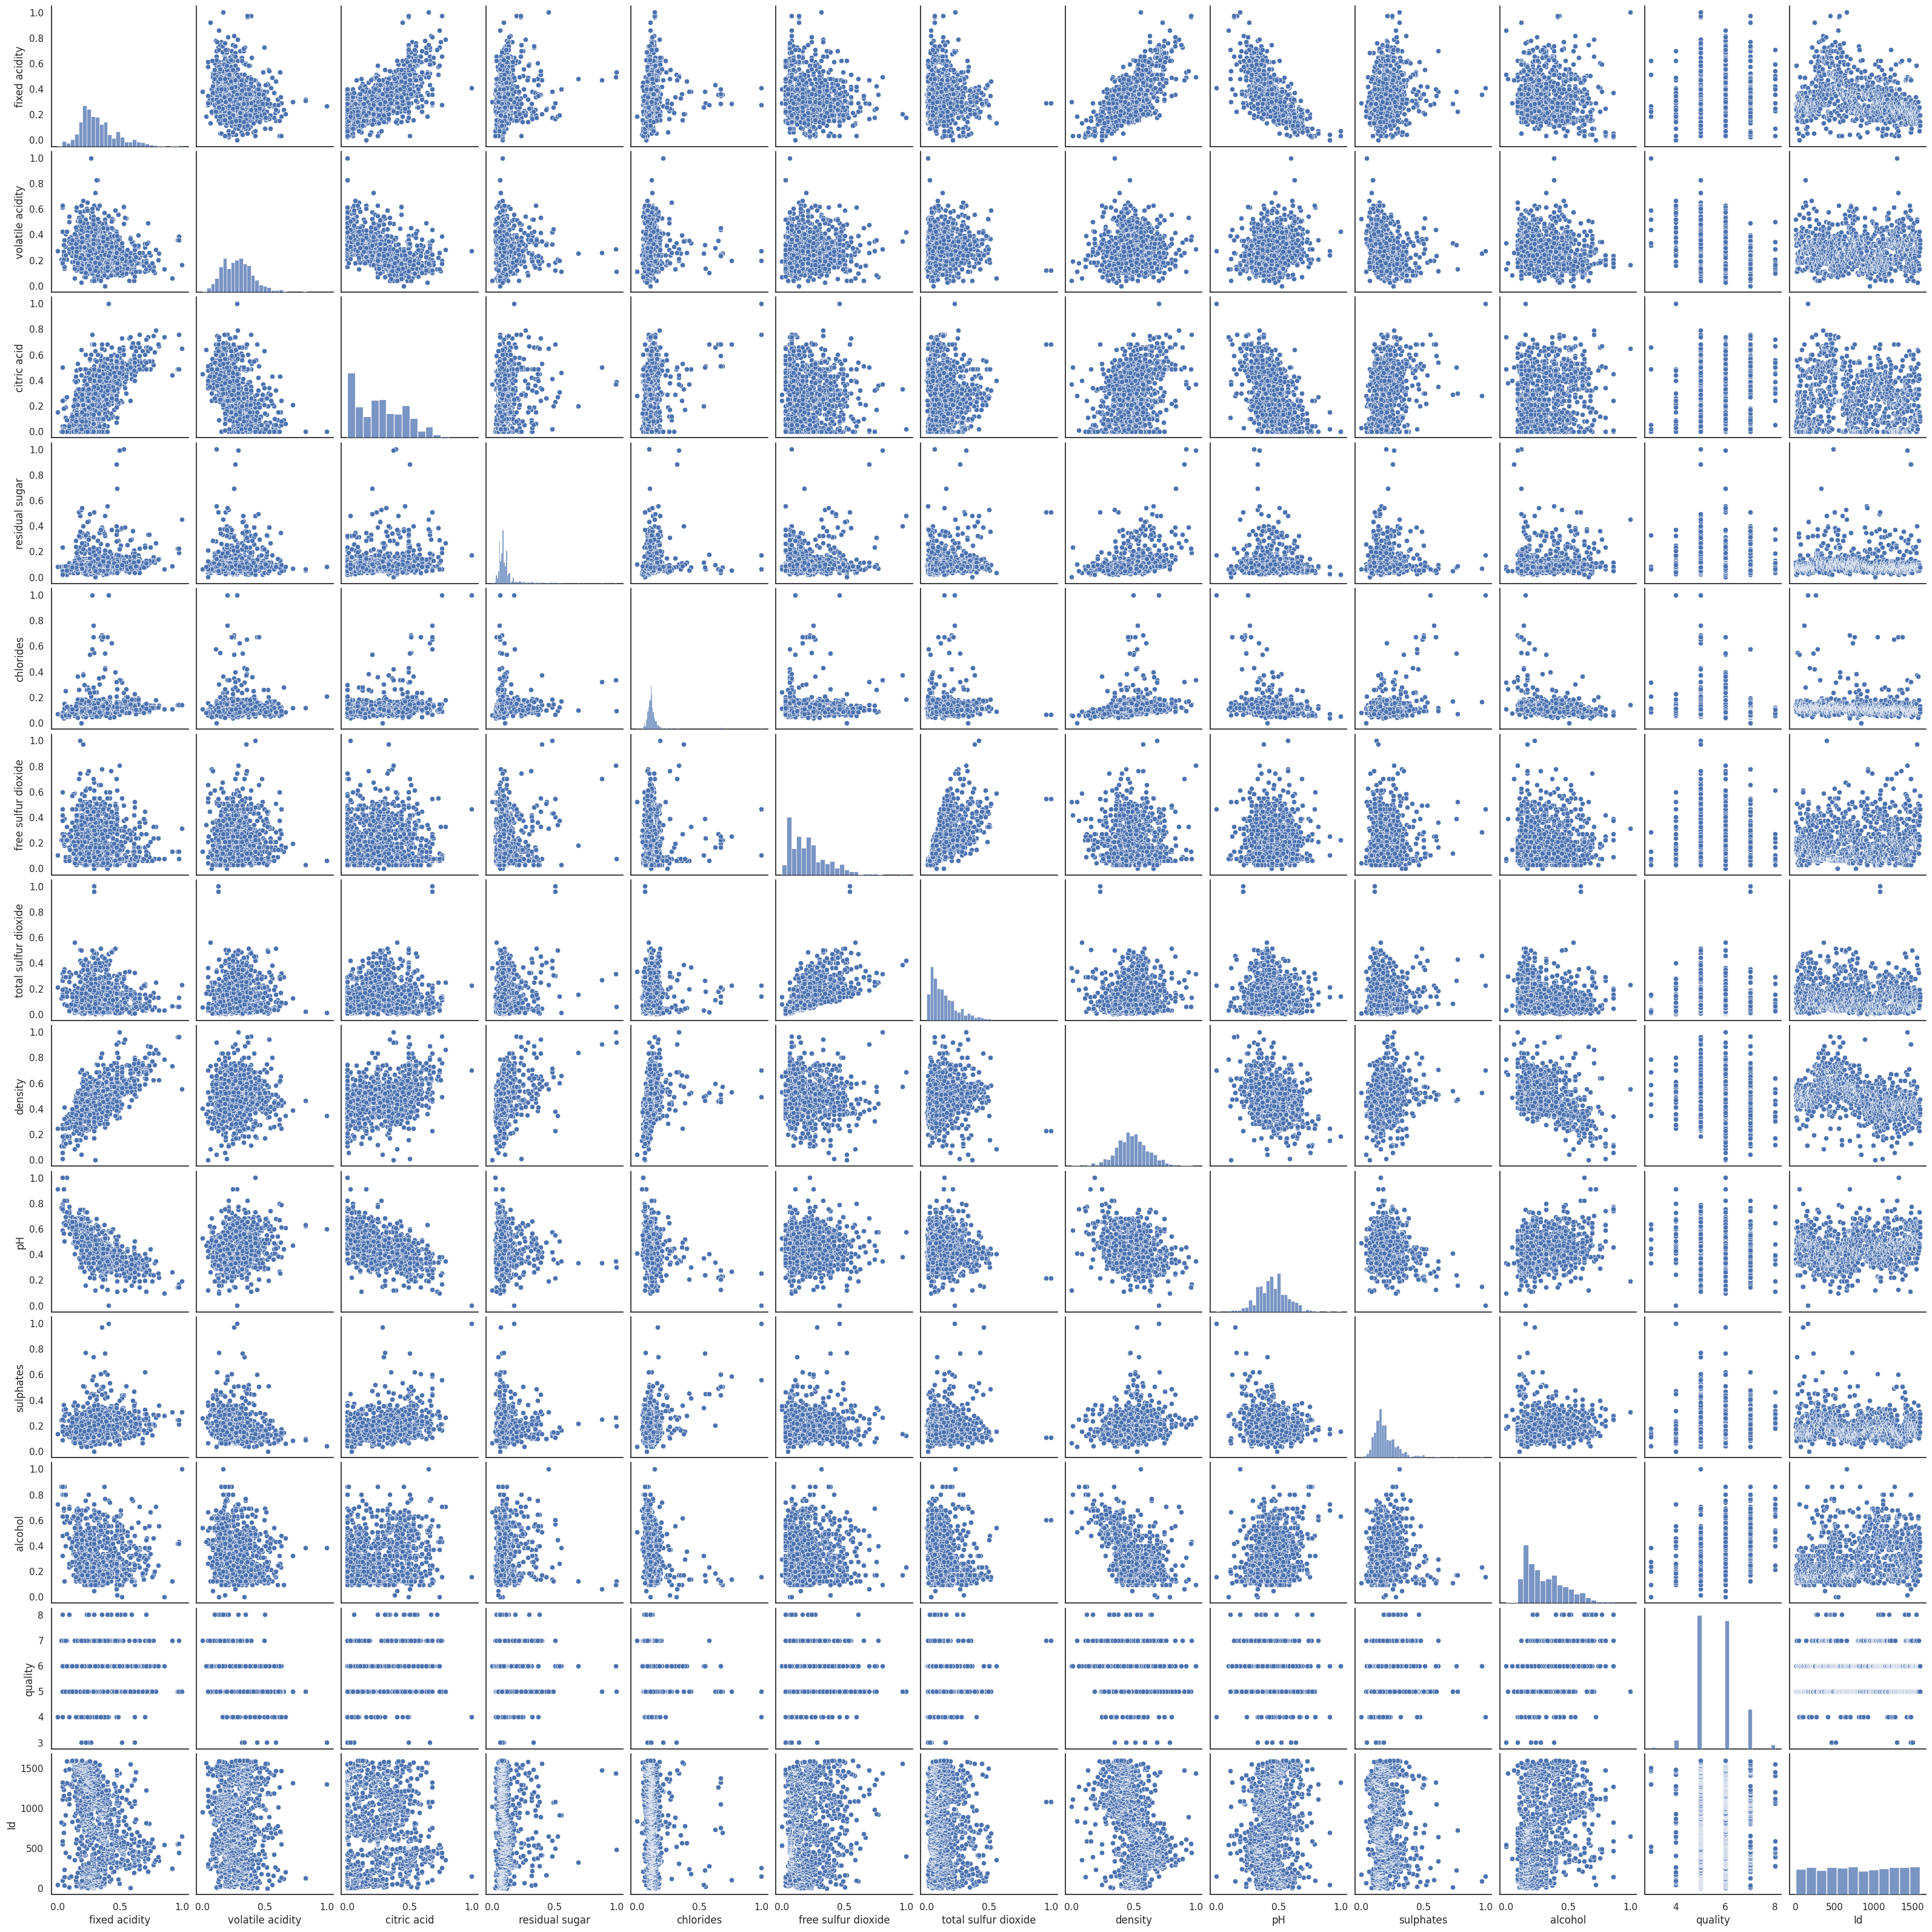

In [188]:
#Comentado porque tarda un poco en cargar
#Configuramos el estilo
sns.set(style="white")
#Creamos la matriz de dispersión
sns.pairplot(data)
plt.show()

Reflexión: Aquí podemos ver de diferentes formas las relaciones de cada uno de nuestras características, me cuesta un poco interpretarlo pero puedo ver que por ejemplo la característica de chlorides la cual tiene los valores más separados entre sí. Esto también se puede comprobar en la matriz de correlación, debido a que no tiene mucha afinidad con el resto de características siendo su mayor relación con sulphates, teniendo un 0.37, igual bajo. Esto también le pasa a residual azucar, la cual tiene el mismo problema, y bueno esto se repite entre varias características.

# SelectKBest

In [189]:
#Separamos la característica de calidad, ya que es la objetivo
X = data.drop('quality', axis=1)
y = data['quality']

#Iremos probando en función a los resultados, a priori cogeremos las mejores 3
#Las mias

k_best = SelectKBest(score_func=f_classif, k=3)
#Aplicamos el metodo en los datos
X_best = k_best.fit_transform(X,y)

#Ahora veremos las 3 columnas que se han seleccionado
select_columnas = X.columns[k_best.get_support()]
print("Las columnas seleccionadas son: ", select_columnas)

Las columnas seleccionadas son:  Index(['volatile acidity', 'sulphates', 'alcohol'], dtype='object')


Las características seleccionadas a priori no se relacionan demasiado bien entre ellas. Debido a que dan números bajos algunos por debajo de 0. Pero puede que me este equivocando al leer el gráfico de correlación. Veremos los resultados que da a la hora de entrenar el modelo. Por lo que ví y entendí una de las mejores sería fixed acidity.

In [190]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB,ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

naive_bayes_models = [GaussianNB(), MultinomialNB(), BernoulliNB(), CategoricalNB()]


# Modelo GaussianNB
modelo_gaussian = GaussianNB()
modelo_gaussian.fit(X_train, y_train)
y_pred_gaussian = modelo_gaussian.predict(X_test)
accuracy_gaussian = round(accuracy_score(y_test, y_pred_gaussian),2)
print(f"GaussianNB - Precisión del modelo: {accuracy_gaussian}")

# Modelo MultinomialNB
modelo_multinomial = MultinomialNB()
modelo_multinomial.fit(X_train, y_train)
y_pred_multinomial = modelo_multinomial.predict(X_test)
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)
print(f"MultinomialNB - Precisión del modelo: {accuracy_multinomial}")

# Modelo BernoulliNB
modelo_bernoulli = BernoulliNB()
modelo_bernoulli.fit(X_train, y_train)
y_pred_bernoulli = modelo_bernoulli.predict(X_test)
accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)
print(f"BernoulliNB - Precisión del modelo: {accuracy_bernoulli}")

#Modelo ComplementNB
modelo_complementNB = ComplementNB()
modelo_complementNB.fit(X_train,y_train)
y_pred_complementNB = modelo_complementNB.predict(X_test)
accuracy_complementNB = accuracy_score(y_test,y_pred_complementNB)
print(f"ComplementNB - Precisión del modelo: {accuracy_complementNB}")


GaussianNB - Precisión del modelo: 0.62
MultinomialNB - Precisión del modelo: 0.5152838427947598
BernoulliNB - Precisión del modelo: 0.4192139737991266
ComplementNB - Precisión del modelo: 0.5109170305676856


In [191]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.20, random_state=42)
caracter_mias = ['pH','citric acid','fixed acidity']
X_selected = X[caracter_mias]

# Modelo GaussianNB
modelo_gaussian = GaussianNB()
modelo_gaussian.fit(X_train, y_train)
y_pred_gaussian = modelo_gaussian.predict(X_test)
accuracy_gaussian = round(accuracy_score(y_test, y_pred_gaussian),2)
print(f"GaussianNB - Precisión del modelo: {accuracy_gaussian}")


GaussianNB - Precisión del modelo: 0.39


Viendo todos estos 4 modelos, podemos ver que los mejores son el gaussianNB y mutlinomialNB. Pero obviamente el que mejor le va con una precisión del 0.62 es el gaussianNB. Después de todo, es un modelo de clasificación y debido a esto, no sería necesario hacer una normalización de los datos, según las cualidades del modelo ganador.




In [192]:
#Hacemos predicciones con el conjunto de prueba y el modelo gaussianNB
predicciónGaussianNB = modelo_gaussian.predict(X_test)
print(predicciónGaussianNB)

[5 6 5 6 7 5 5 6 5 6 7 5 5 5 6 5 6 5 5 5 5 5 5 5 5 5 5 7 5 5 5 5 7 5 5 5 5
 5 6 5 5 5 6 5 5 5 5 7 5 5 5 5 5 5 5 7 5 6 7 6 7 5 6 5 6 5 5 5 5 7 7 5 5 4
 5 5 6 5 5 5 5 5 5 5 5 5 6 5 5 5 6 5 7 5 5 5 6 7 7 5 5 4 5 5 6 6 6 7 5 6 5
 7 7 6 5 5 6 7 5 5 5 5 6 5 5 5 5 5 5 7 5 5 7 5 7 5 5 5 5 5 6 5 7 5 7 6 5 5
 5 5 6 5 7 5 6 5 5 6 6 6 7 5 5 6 6 5 7 5 6 5 5 6 5 5 5 5 5 5 5 5 7 7 5 5 5
 5 5 5 7 6 5 5 5 7 6 6 5 5 5 5 6 5 6 5 7 7 5 5 5 7 6 7 5 5 6 6 7 5 7 7 6 6
 5 5 4 5 5 5 7]


In [193]:
#Hacemos predicciones con el conjunto de prueba y el modelo MultinomialNB
predicción = modelo_multinomial.predict(X_test)
print(predicción)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Id
- alcohol
- chlorides
- density
- free sulfur dioxide
- ...


Viendo las predicciones, se puede apreciar que el primer modelo tiene más variedad que el segundo, que no quiere decir que el segundo haya predicho mal pero debido a que el primero tiene mayor porcentaje de cierto, pues es más creíble el modelo gaussinNB

In [194]:
#Informe de clasificación
print("Información de clasificación: ")
print(classification_report(y_test, predicciónGaussianNB))

Información de clasificación: 
              precision    recall  f1-score   support

           4       0.33      0.17      0.22         6
           5       0.46      0.69      0.55        96
           6       0.32      0.14      0.20        99
           7       0.24      0.35      0.29        26
           8       0.00      0.00      0.00         2

    accuracy                           0.39       229
   macro avg       0.27      0.27      0.25       229
weighted avg       0.36      0.39      0.35       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Usando cross validation

In [195]:
#Usando cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
X_best = k_best.fit_transform(X,y)
# X_my = data[['fixed acidity','pH','chlorides']]
y = data['quality']

modelo = GaussianNB()
modelo_2 = MultinomialNB()

#Hacer cross validation
cros_val = cross_val_score(modelo,X_best, y, cv=3, scoring='accuracy')
# Imprimir resultados detallados
print("Columnas seleccionadas son: ", select_columnas)
print("Resultados de la validación cruzada de gaussianNB:")
print("Precisión media: {:.2f}".format(cros_val.mean()))
print("Desviación estándar de la precisión: {:.2f}".format(cros_val.std()))

#Hacer cross validation
cros_val_2 = cross_val_score(modelo_2,X_best, y, cv=3, scoring='accuracy')
# Imprimir resultados detallados
print("\nColumnas seleccionadas son: ", select_columnas)
print("Resultados de la validación cruzada de multinomialNB:")
print("Precisión media: {:.2f}".format(cros_val_2.mean()))
print("Desviación estándar de la precisión: {:.2f}".format(cros_val_2.std()))

Columnas seleccionadas son:  Index(['volatile acidity', 'sulphates', 'alcohol'], dtype='object')
Resultados de la validación cruzada de gaussianNB:
Precisión media: 0.58
Desviación estándar de la precisión: 0.03

Columnas seleccionadas son:  Index(['volatile acidity', 'sulphates', 'alcohol'], dtype='object')
Resultados de la validación cruzada de multinomialNB:
Precisión media: 0.53
Desviación estándar de la precisión: 0.02


En este caso, el cross validation en vez de mejorar el rendimiento, lo que ha hecho es reducir su precisión, en el caso de gaussianNB. Es no es el caso de multinomialNB, en su caso hace que mejore un poco. Ambos solo lo dividí en 3 conjuntos, debido a que es el que mejores resultados.[texto del enlace](https://)

En este caso, ganó el que no usaba cross validation. Esto obviamente no quiere decir que el cross validation no sea útil sino que simplemente que para este dataset no es óptimo. Aunque también es verdad que tampoco es que la diferencia entre uno y otro sea muy grande, pero es importante igualmente.

In [204]:
# Utilizando cross validation (Kfold)
names = ["GaussianNB", "MultiNomialNB", 'BernouilliNB', 'ComplementNB']
classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB(), ComplementNB()]
from sklearn.model_selection import KFold
cv = KFold(n_splits = 3, shuffle = True)
total_scores = []
for name, clf in zip(names, classifiers):
  fold_accuracy = []
  for train_fold, test_fold in cv.split(X_train):
    # División train test aleatoria
    f_train_x = X_train.iloc[train_fold]
    f_train_y = y_train.iloc[train_fold]
    # entrenamiento y ejeución del modelo
    clf.fit(f_train_x, f_train_y)
    # Realizamos la predicción (Final evaluation) y guardamos la precisión para calcular la media posteriormente
    y_pred = clf.predict(X_train.iloc[test_fold])
    # evaluación del modelo
    acc = accuracy_score(y_train.iloc[test_fold], y_pred)
    fold_accuracy.append(acc)
  total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

for i in range(len(names)):
  print ("Modelo: %s = %6.2f" % (names[i], total_scores[i]))

Modelo: GaussianNB =   0.44
Modelo: MultiNomialNB =   0.42
Modelo: BernouilliNB =   0.39
Modelo: ComplementNB =   0.33


In [196]:
#Resultado
print("La presición del modelo sin cross validarion es de", round(accuracy_gaussian,3) ," y con cross validation es de {:.2f}".format(cros_val.mean()))
print("Por lo que se ve que por poco margen el que no usa cross validation tiene mejor precisión")

La presición del modelo sin cross validarion es de 0.39  y con cross validation es de 0.58
Por lo que se ve que por poco margen el que no usa cross validation tiene mejor precisión


Como ya he dicho, en este caso, el no usar cross validation da mejores resultados que usandolo. Esto no quiere decir que el cross validation no sirva o algo así sino que simplemente para este caso no lo es, como ejemplo de de ello es que el cross validation si que mejora el modelo MultinomialNB.

# Calculamos el MAE

In [ ]:
# Calcular el MAE usando scikit-learn
from sklearn.metrics import mean_absolute_error

mae = round(mean_absolute_error(y_test, predicción),2)

print(f"Error Absoluto Medio (MAE): {mae}")
#Basicamente con esto vemos que suele acertar la casi la mitad de las veces.

# Calculamos el MAPE

In [197]:
from sklearn.metrics import mean_absolute_percentage_error
mape = round((mean_absolute_percentage_error(y_test, predicción)),2)
print(f"Error porcentual absoluto medio (MAPE): {mape}")

Error porcentual absoluto medio (MAPE): 0.1
